[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\rafab\AppData\Local\Temp\ipykernel_11592\1321113702.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Processed_Text'] = cleaned_data['Title'].astype(str) + ' ' + cleaned_data['Text'].astype(str)
C:\Users\rafab\AppData\Local\Temp\ipykernel_11592\

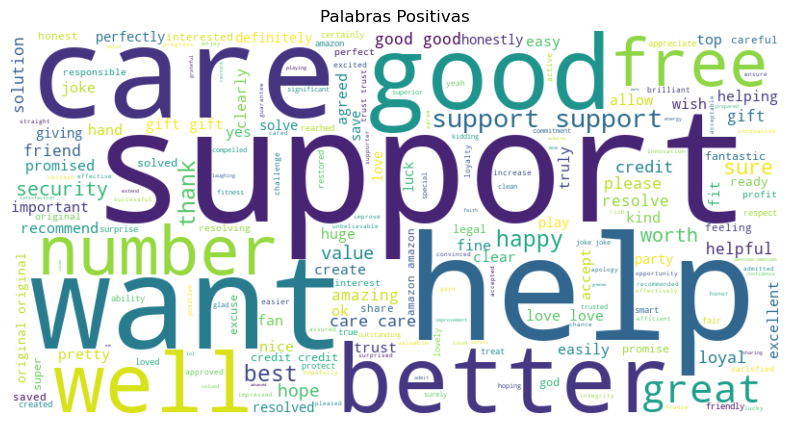

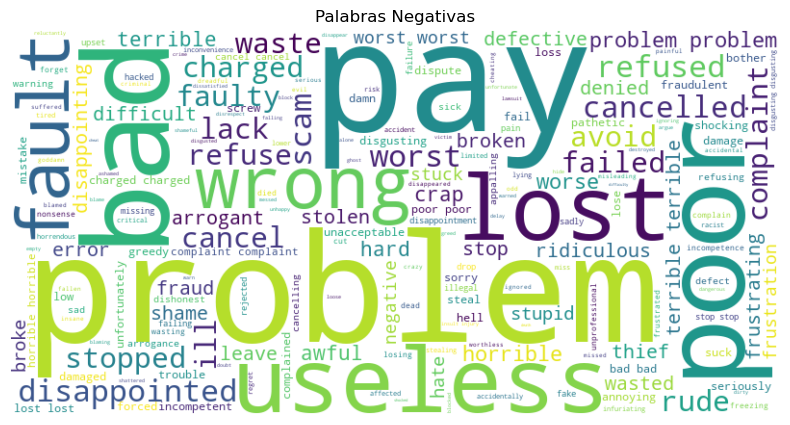

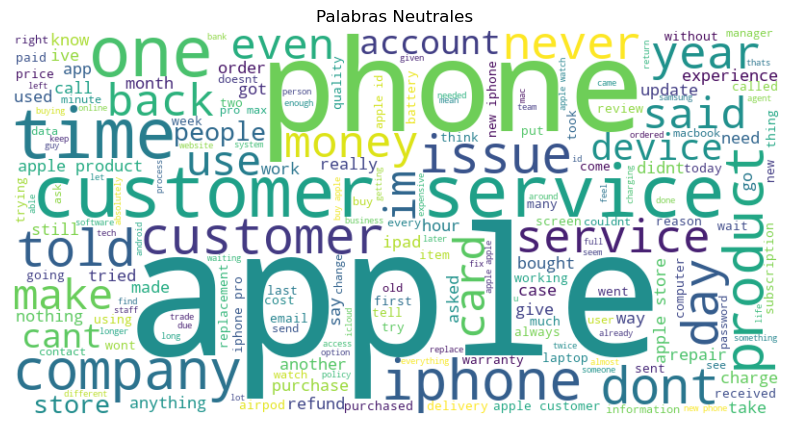

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

# Descargar recursos de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Instanciar lematizador y analizador de sentimientos
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

# Definir stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación y caracteres no alfabéticos
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenizar y eliminar stopwords, y lematizar
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Cargar el archivo CSV
file_path = 'Data/Apple Reviews.csv'
data = pd.read_csv(file_path)

# Eliminar filas con valores nulos en las columnas 'Title' y 'Text'
cleaned_data = data.dropna(subset=['Title', 'Text'])

# Aplicar preprocesamiento al texto combinado
cleaned_data['Processed_Text'] = cleaned_data['Title'].astype(str) + ' ' + cleaned_data['Text'].astype(str)
cleaned_data['Processed_Text'] = cleaned_data['Processed_Text'].apply(preprocess_text)

# Función para clasificar el sentimiento de las palabras
def sentiment_analysis(text):
    pos_words = []
    neg_words = []
    neu_words = []
    
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)
        if score['compound'] >= 0.05:
            pos_words.append(word)
        elif score['compound'] <= -0.05:
            neg_words.append(word)
        else:
            neu_words.append(word)
    
    return pos_words, neg_words, neu_words

# Aplicar análisis de sentimiento al texto preprocesado
combined_text = ' '.join(cleaned_data['Processed_Text'])
pos_words, neg_words, neu_words = sentiment_analysis(combined_text)

# Función para generar y mostrar nubes de palabras
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Nube de palabras positivas
generate_wordcloud(pos_words, 'Palabras Positivas')

# Nube de palabras negativas
generate_wordcloud(neg_words, 'Palabras Negativas')

# Nube de palabras neutrales
generate_wordcloud(neu_words, 'Palabras Neutrales')

In [2]:
# Modificar la función para devolver una etiqueta de sentimiento general
def sentiment_label(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicar la función a la columna 'Processed_Text' para obtener la etiqueta de sentimiento
cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)
cleaned_data

C:\Users\rafab\AppData\Local\Temp\ipykernel_11592\4149664210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)


,Date,Rating,Name,Title,Text,Response,Data Response,Processed_Text,Sentiment
0,8 hours ago,3,James Franklin,Difficult Company,Difficult - I was convinced to go to a dark si...,NaN,NaN,difficult company difficult convinced go dark ...,Positive
1,A day ago,3,Demarcus Jones,I purchased my apple watch from this…,I purchased my apple watch from this website a...,NaN,NaN,purchased apple watch purchased apple watch we...,Negative
2,An hour ago,1,Mike Farbar,Scamming people publicly,Share location of your iphone needs internet o...,NaN,NaN,scamming people publicly share location iphone...,Positive
3,6 days ago,4,Ray,Solid phones & tablets,Great solid products both phones and tablets. ...,NaN,NaN,solid phone tablet great solid product phone t...,Positive
4,2 hours ago,1,Veronika,"Nothing new, just more difficult",I don't know how is Apple not ashamed of their...,NaN,NaN,nothing new difficult dont know apple ashamed ...,Positive
...,...,...,...,...,...,...,...,...,...
995,24-Aug-23,1,John Marks,Iphone 8 plus battery change,I have an iPhone 8 plus and it’s been running ...,NaN,NaN,iphone plus battery change iphone plus running...,Positive
996,24-Aug-23,1,Holley Ellingson,I bought my fist iPhone.,I bought my fist iPhone and it did not come wi...,NaN,NaN,bought fist iphone bought fist iphone come plu...,Negative
997,24-Aug-23,1,Maria Habipi,Rubbish,"Rubbish, useless, company!Has elevated to rock...",NaN,NaN,rubbish rubbish useless companyhas elevated ro...,Negative
998,24-Aug-23,5,ABC,I bought an iphone 14 Pro Max last May.,I bought an iphone 14 Pro Max last May.After o...,NaN,NaN,bought iphone pro max last may bought iphone p...,Positive


In [3]:
def calculate_nps(cleaned_data):
    promoters = cleaned_data[cleaned_data['Rating'] >= 4].shape[0]
    detractors = cleaned_data[cleaned_data['Rating'] <= 2].shape[0]
    passives = cleaned_data[cleaned_data['Rating'] == 3].shape[0]
    total_respondents = cleaned_data.shape[0]
    nps = ((promoters - detractors) / total_respondents) * 100
    return nps, promoters, passives, detractors

nps, promoters, passives, detractors = calculate_nps(cleaned_data)
print(f'Net Promoter Score (NPS): {nps}')

Net Promoter Score (NPS): -61.855670103092784


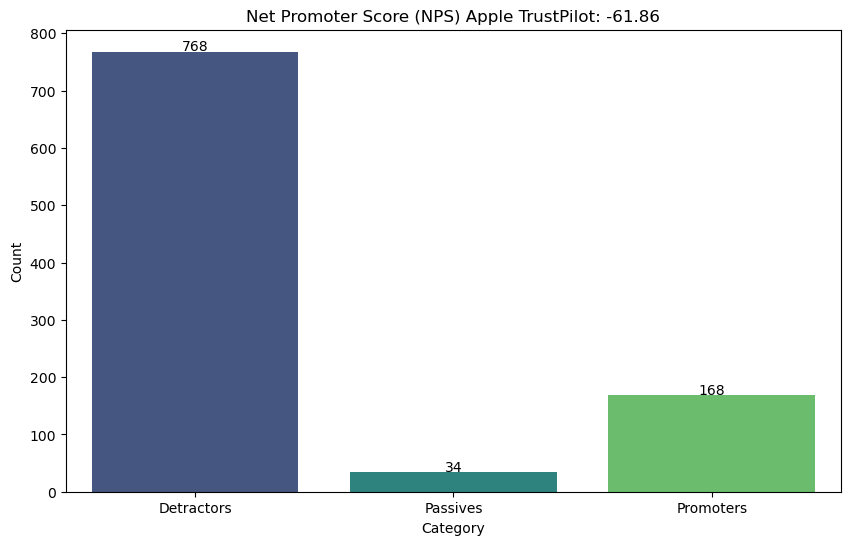

In [4]:
# Datos para la visualización
nps_data = pd.DataFrame({
    'Category': ['Detractors', 'Passives', 'Promoters'],
    'Count': [detractors, passives, promoters]
})

# Crear el gráfico de barras para NPS
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=nps_data, palette='viridis')
plt.title(f'Net Promoter Score (NPS) Apple TrustPilot: {nps:.2f}')
plt.xlabel('Category')
plt.ylabel('Count')

# Añadir las etiquetas de los valores en las barras
for index, value in enumerate(nps_data['Count']):
    plt.text(index, value + 2, str(value), ha='center')

plt.show()

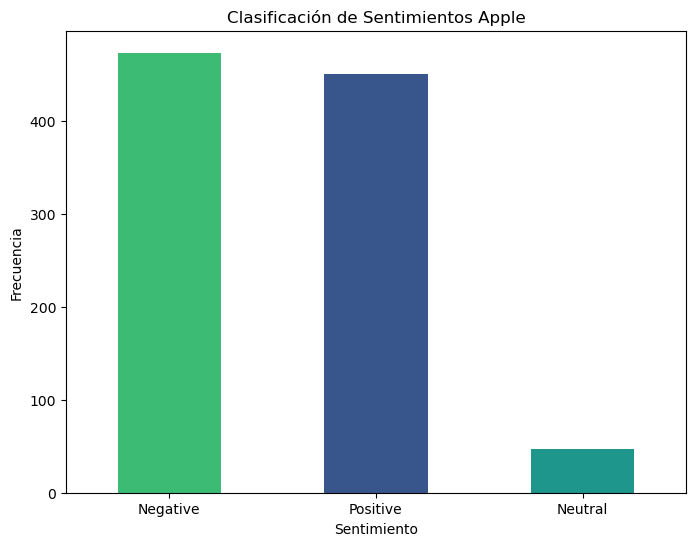

In [5]:
# Contar las ocurrencias de cada sentimiento
conteo_sentimientos = cleaned_data['Sentiment'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_sentimientos.plot(kind='bar', color=['#3CBB75FF', '#39568CFF', '#1F968BFF'])

# Establecer títulos y etiquetas
plt.title('Clasificación de Sentimientos Apple')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar la visualización
plt.show()


In [6]:
# Definimos las palabras clave para cada tema
keywords = {
    'Customer Service': ["service", "support", "help", "customer", "warranty", "experience", "Care", "refund", "coomunication", "repair", "contact", "claim"],
    'Staff': ["staff", "employee", "worker", "associate", "unprofessional", "techinician"],
    'Price': ["price", "cost", "expensive", "cheap", "$", "money", "pay"],
    'Ease of Use': ["easy", "difficult", "user-friendly", "complex", "friendly"],
    'Sales': ["sale", "discount", "offer", "sold", "purchased", "purchase", "buy", "bought", "free"],
    'Delivery': ["slow", "fast", "speed", "punctual", "delayed", "late", "early", "Delivery", "days", "weeks", "months", "week", "day", "month", "forever", "order", "ordered"],
    'Coverage': ["coverage", "network", "signal"],
    'Terms': ["terms", "conditions", "policy", "appliances"],
    'Setup': ["setup", "install", "configuration", "set up", "replacement", "implement", "implementation"],
    'Quality': ["security", "damaged", "material", "product", "broken", "package", "horrible", "good", "best", "worst", "terrible", "glitch", "bug", "impressed", "bad", "Quality", "malfunction", "feature", "issue", "update", "poor", "failed", "performance", "program", "screen"]
}

# Función para clasificar el tema basado en las palabras clave
def classify_topic(title, text):
    combined_text = f"{title} {text}".lower()
    for topic, words in keywords.items():
        if any(word in combined_text for word in words):
            return topic
    return 'Other'

# Aplicamos la función al DataFrame
cleaned_data['topic'] = cleaned_data.apply(lambda row: classify_topic(row['Title'], row['Processed_Text']), axis=1)

# Mostramos las primeras filas para verificar
cleaned_data.head()


C:\Users\rafab\AppData\Local\Temp\ipykernel_11592\723630023.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['topic'] = cleaned_data.apply(lambda row: classify_topic(row['Title'], row['Processed_Text']), axis=1)


,Date,Rating,Name,Title,Text,Response,Data Response,Processed_Text,Sentiment,topic
0,8 hours ago,3,James Franklin,Difficult Company,Difficult - I was convinced to go to a dark si...,NaN,NaN,difficult company difficult convinced go dark ...,Positive,Customer Service
1,A day ago,3,Demarcus Jones,I purchased my apple watch from this…,I purchased my apple watch from this website a...,NaN,NaN,purchased apple watch purchased apple watch we...,Negative,Customer Service
2,An hour ago,1,Mike Farbar,Scamming people publicly,Share location of your iphone needs internet o...,NaN,NaN,scamming people publicly share location iphone...,Positive,Price
3,6 days ago,4,Ray,Solid phones & tablets,Great solid products both phones and tablets. ...,NaN,NaN,solid phone tablet great solid product phone t...,Positive,Quality
4,2 hours ago,1,Veronika,"Nothing new, just more difficult",I don't know how is Apple not ashamed of their...,NaN,NaN,nothing new difficult dont know apple ashamed ...,Positive,Price


In [7]:
# Prepara los datos para el heatmap
df_topics = cleaned_data['topic'].str.get_dummies(sep=',')
df_topics_sum = df_topics.sum().sort_values(ascending=False)

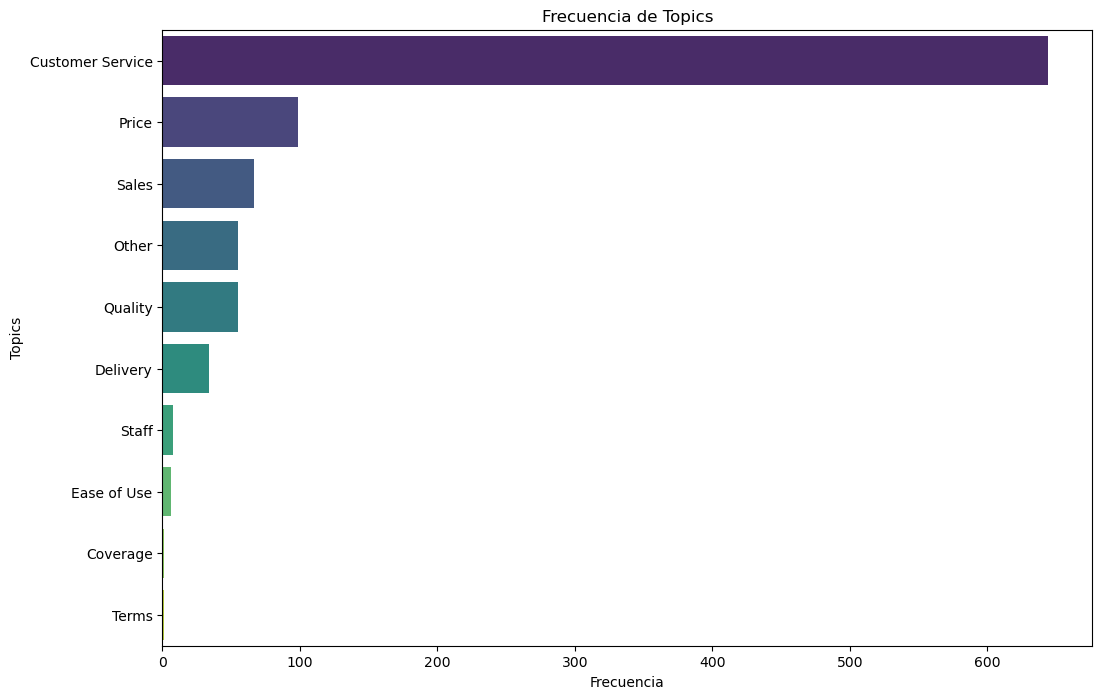

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_topics_sum.values, y=df_topics_sum.index, palette='viridis')
plt.title('Frecuencia de Topics')
plt.xlabel('Frecuencia')
plt.ylabel('Topics')
plt.show()

In [9]:
cleaned_data.to_csv('Apple_reviews_modificado.csv', index = False)